# EDA analysis

### Цель проекта - отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

### Для решения этого вопроса, необходимо провести группировку данных, а также очистку данных (устранение выбросов и ошибочных значений). Для дальнейшей работы необходима корреляция значения и пострение начальных гипотез.

In [1]:
# Импорт всех библиотек необходимых для EDA

from itertools import combinations

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

%matplotlib inline

sns.set()

In [2]:
pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

students = pd.read_csv('stud_math.csv')

#  pre-processing 

In [3]:
#Функция для получения базовой, необходимой информации по столбцам

def basic_info(df, column_name):

    print(f"Уникальные значения для {column_name}: {df[column_name].unique()}")
    l = len(df[column_name].unique())
    print(f'Количество уникальных значений: {l}')
    print("Распределение уникальных значений:")
    print(f'Пустых значений {sum(df[column_name].isnull())}')
    print('Общая информация')
    print(df[column_name].describe())

#Функция для построения графика boxplot чтобы получить информацию о необходимой информации 
#(медианы, выбросы, пустые значения размеры квартилей)

def get_boxplot(df, column):
    fig, ax = plt.subplots(figsize=(7, 5))
    sns.boxplot(x=column, y='score',
                data=df.loc[df.loc[:, column].isin(
                    df.loc[:, column].value_counts().index[:10])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

#Функция для расчета верхних и нижних квартилей, межквартильного размаха, 
#чтобы получить информацию о количестве выбросов

def outliers(df, column_name):

    median = df[column_name].median()
    perc25 = df[column_name].quantile(0.25)
    perc75 = df[column_name].quantile(0.75)
    IQR = perc75 - perc25
    f = perc25 - 1.5*IQR
    l = perc75 + 1.5*IQR
    print('Медиана: {},'.format(median),
          '25-й перцентиль: {},'.format(perc25),
          '75-й перцентиль: {},'.format(perc75),
          "IQR: {}, ".format(IQR),
          "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR,
                                                 l=perc75 + 1.5*IQR))
    out = []

    for row in students.absences:
        if row < f or row > l:
            out.append(row)
    print(f'Число выбросов: {len(out)}, {min(out)} до {max(out)}')

#Ввод переменных, разделяющих все столбцы на количественные и категориальные данные    
    
numerical_column = [x for x in students.columns if x in ['absences', 'score', 'age']]
categorical_column = [x for x in students.columns if x not in ['absences', 'score', 'age']]

#Функция расчета статистической значимости по методу Стьюдента

def get_stat_dif(df, column):
    cols = df.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))

    for comb in combinations_all:
        if ttest_ind(df.loc[df.loc[:, column] == comb[0], 'score'],
                     df.loc[df.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

#  Первичный отсмотр данных.

In [4]:
display(students.head(10))
students.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

Согласно полученной информации всего в выборке 30 категорий и 395 студентов. Из 30 категорий только 3 полностью заполнены (имеют ненулевые значения).Также 17 из них имеют не числовые значения, остальные численные. Также все названия столбцов в удовлетворительном виде и не нуждаются в изменениях. Поэтому можно перейти к анализу отдельных столбцов. По типу данных разделение идет на количествинные данные (оценка, количество пропущенных занятий) и категориальные (все остальные), поеэтому их можно разделить.



#  Первичный анализ данных в столбцах.

## Количественные данные

### Целевая колонка с оценками

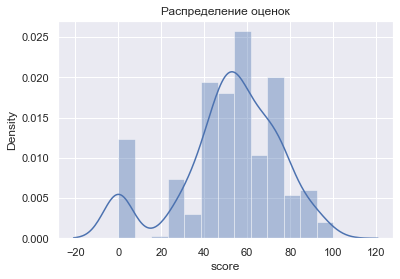

Уникальные значения для score: [ 30.  50.  75.  55.  95.  45.  60.  70.  80.  25.  40.  85.  90.  65.
 100.  35.   0.  nan  20.]
Количество уникальных значений: 19
Распределение уникальных значений:
Пустых значений 6
Общая информация
count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64


50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
40.0     31
60.0     31
70.0     27
45.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64

In [5]:
sns.distplot(students.score)
plt.title("Распределение оценок")
plt.show()

basic_info(students, 'score')
students.score.value_counts()

В выборке присутствуют пустые значения. Значений меньше 0 или больше 100 замечено не было.  В обработке пустые значения а также значения которые набрали 0 (возможно ошибочные) будут удалены.

### absences — количество пропущенных занятий

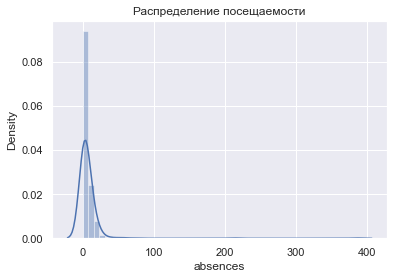

Уникальные значения для absences: [  6.   4.  10.   2.   0.  16.  nan  14.   7.   8.  25.  12.  54.  18.
  26.  20.  56.  24.  28.   5.  13.  15.  22.   3. 385.  21.   1.  75.
  30.  19.   9.  11.  38.  40.  23.  17. 212.]
Количество уникальных значений: 37
Распределение уникальных значений:
Пустых значений 12
Общая информация
count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64


In [6]:
sns.distplot(students.absences)
plt.title("Распределение посещаемости")
plt.show()

basic_info(students, 'absences')


In [7]:
outliers(students, 'absences')
students.absences.value_counts()

Медиана: 4.0, 25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].
Число выбросов: 17, 21.0 до 385.0


0.0      111
2.0       60
4.0       53
6.0       31
8.0       21
10.0      17
12.0      12
14.0      12
3.0        8
16.0       7
7.0        6
5.0        5
18.0       5
20.0       4
22.0       3
9.0        3
1.0        3
15.0       2
13.0       2
11.0       2
25.0       1
54.0       1
385.0      1
26.0       1
56.0       1
24.0       1
212.0      1
21.0       1
75.0       1
30.0       1
19.0       1
38.0       1
40.0       1
23.0       1
17.0       1
28.0       1
Name: absences, dtype: int64

В данных по количеству пропусков присутствуют выбросы, в большом количестве, а также пустые значения. Для дальнейшего анализа необходимо изменить пустые значения, А также удалить выбросы. Однако судя по количеству пропусков во избежание потерь данных лучше подять верхнюю границу до 25

### age — возраст ученика (от 15 до 22)

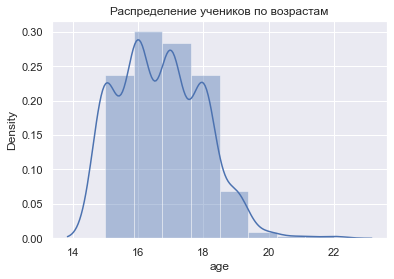

Уникальные значения для age: [18 17 15 16 19 22 20 21]
Количество уникальных значений: 8
Распределение уникальных значений:
Пустых значений 0
Общая информация
count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64


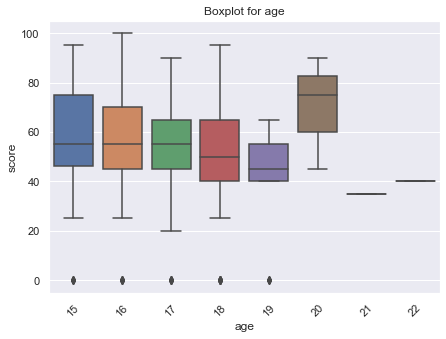

In [8]:
sns.distplot(students.age, bins=8)
plt.title("Распределение учеников по возрастам")
plt.show()

basic_info(students, 'age')
get_boxplot(students, 'age')




Исходя из условий в данной выборке участуют ученики в возрасте от 15 до 22х лет. Большая часть из них в возрасте 16ти лет. В выборке нет пропусков и отказываться от малых значений более старших учеников нет смысла. Также по воторому графику видно, что разница в возрасте влияет на результаты теста. 

## Категориальные данные

### school — аббревиатура школы, в которой учится ученик

Уникальные значения для school: ['GP' 'MS']
Количество уникальных значений: 2
Распределение уникальных значений:
Пустых значений 0
Общая информация
count     395
unique      2
top        GP
freq      349
Name: school, dtype: object


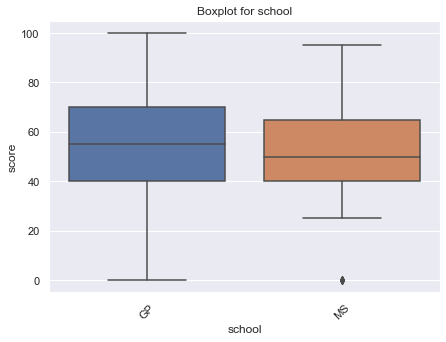

In [9]:
basic_info(students, 'school')
get_boxplot(students, 'school')

Школы две, пропуски отсутствуют как и выбросы. Выборка школы GP в 7.5 раз больше чем в MS, также школа мало влияет на показатели оценки учеников.

### sex — пол ученика ('F' - женский, 'M' - мужской)

Уникальные значения для sex: ['F' 'M']
Количество уникальных значений: 2
Распределение уникальных значений:
Пустых значений 0
Общая информация
count     395
unique      2
top         F
freq      208
Name: sex, dtype: object


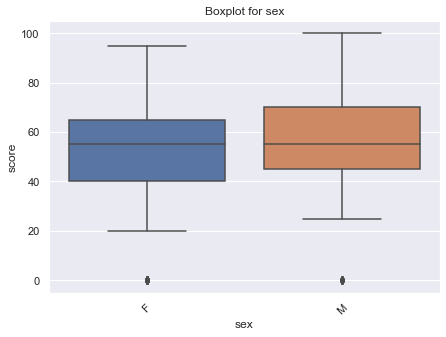

In [10]:
basic_info(students, 'sex')
get_boxplot(students, 'sex')

Пропуски отсутствуют как и выбросы. Девочек немного больше чем мальчиков, однако мальчики в целом сдали немного лучше.

### address — тип адреса ученика ('U' - городской, 'R' - за городом)

Уникальные значения для address: ['U' nan 'R']
Количество уникальных значений: 3
Распределение уникальных значений:
Пустых значений 17
Общая информация
count     378
unique      2
top         U
freq      295
Name: address, dtype: object


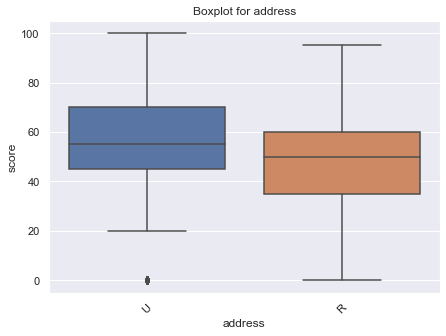

In [11]:
basic_info(students, 'address')
get_boxplot(students, 'address')

Тут присутствует 17 пустых значений. Также видно, что ученики проживающие за городом в среднем сдали хуже чем городские.

### famsize — размер семьи('LE3' <= 3, 'GT3' >3)

Уникальные значения для famsize: [nan 'GT3' 'LE3']
Количество уникальных значений: 3
Распределение уникальных значений:
Пустых значений 27
Общая информация
count     368
unique      2
top       GT3
freq      261
Name: famsize, dtype: object


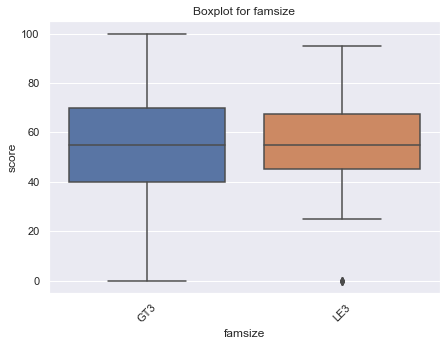

In [12]:
basic_info(students, 'famsize')
get_boxplot(students, 'famsize')

В этой категории присутствует 27 пустых значений. В большинстве преобладают семьи с количеством больше 3х человек, однако судя по графику они мало влияют на конечный результат по математике среди учеников.

### Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

Уникальные значения для Pstatus: ['A' nan 'T']
Количество уникальных значений: 3
Распределение уникальных значений:
Пустых значений 45
Общая информация
count     350
unique      2
top         T
freq      314
Name: Pstatus, dtype: object


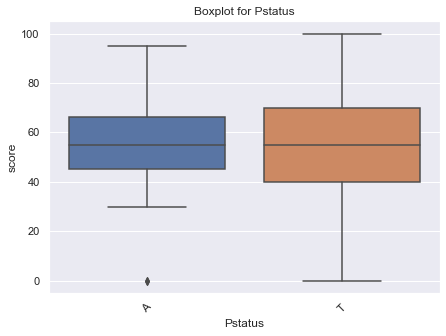

In [13]:
basic_info(students, 'Pstatus')
get_boxplot(students, 'Pstatus')

В этой категории присутствует 45 пустых хначений, выбросы отсутствуют. Большая часть из выборки живет в полноценной семье. Согласно графику показатели успеваемости мало отличаются друг от друга.

### Обзор столбцов с образованием родителей (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее). 
### Обзор столбцов с местом работы родителей ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

Уникальные значения для Medu: [ 4.  1.  3.  2. nan  0.]
Количество уникальных значений: 6
Распределение уникальных значений:
Пустых значений 3
Общая информация
count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64


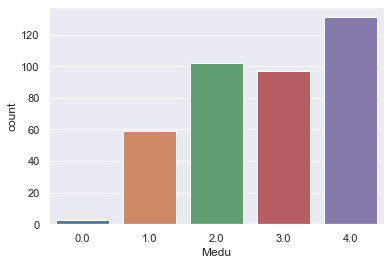

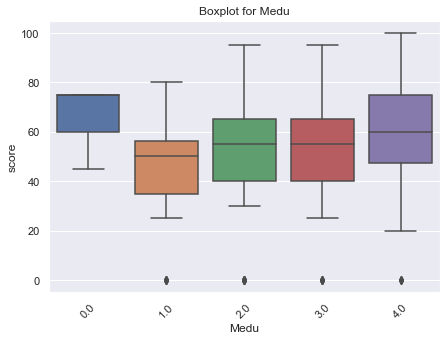

Уникальные значения для Fedu: [ 4.  1.  2.  3. 40. nan  0.]
Количество уникальных значений: 7
Распределение уникальных значений:
Пустых значений 24
Общая информация
count    371.000000
mean       2.614555
std        2.228732
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       40.000000
Name: Fedu, dtype: float64


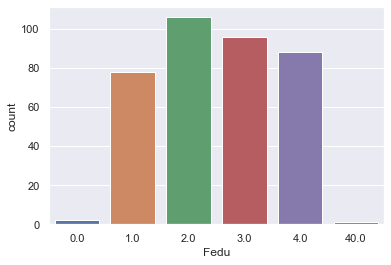

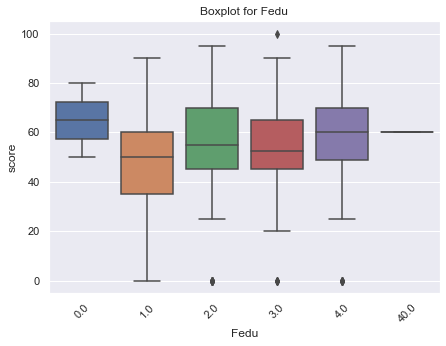

Уникальные значения для Mjob: ['at_home' 'health' 'other' 'services' 'teacher' nan]
Количество уникальных значений: 6
Распределение уникальных значений:
Пустых значений 19
Общая информация
count       376
unique        5
top       other
freq        133
Name: Mjob, dtype: object


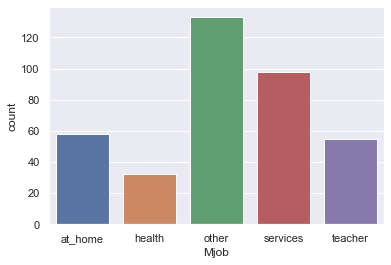

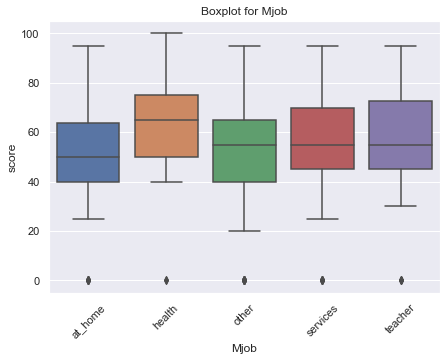

Уникальные значения для Fjob: ['teacher' 'other' nan 'health' 'services' 'at_home']
Количество уникальных значений: 6
Распределение уникальных значений:
Пустых значений 36
Общая информация
count       359
unique        5
top       other
freq        197
Name: Fjob, dtype: object


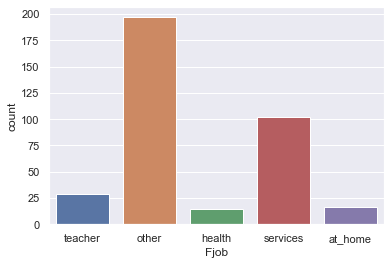

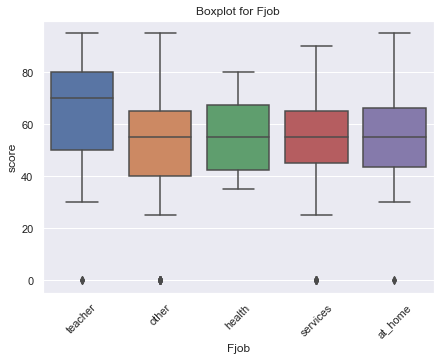

In [14]:
for col in ['Medu','Fedu','Mjob','Fjob']:
    sns.countplot(students[col])
   
    basic_info(students, col)
    get_boxplot(students, col)

Значения образования матери и отца достаточно интересны и влияют на показатели оценок. В обоих категориях присутствуют пустые значения (3- у матери и 27 - у отца) также присутствует выброс в виде значения 40 у отца (скорее всего это ощибка и должна присутствовать 4ка или 0, но так как 4 встречается чаще то заменим её вдальнейшем на 4)

В категориях работы также присутствуют пустые знаячения (19 для матери и 36 для отца). У обоих категорий преобладает значение другое, что свидетельствует о том, что родители работают в сферах не указаных в выборке.

### reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

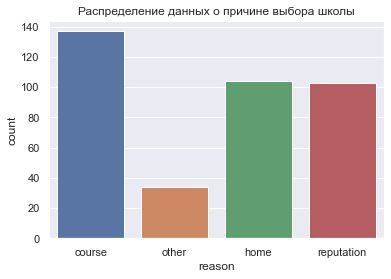

Уникальные значения для reason: ['course' 'other' 'home' 'reputation' nan]
Количество уникальных значений: 5
Распределение уникальных значений:
Пустых значений 17
Общая информация
count        378
unique         4
top       course
freq         137
Name: reason, dtype: object


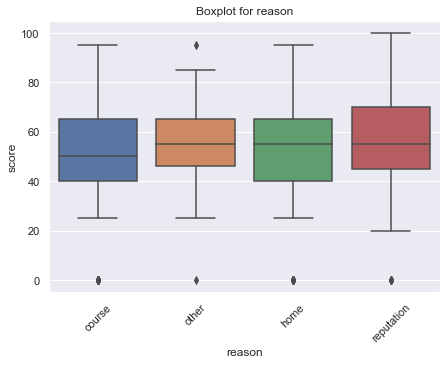

In [15]:
sns.countplot(students.reason)
plt.title("Распределение данных о причине выбора школы")
plt.show()
basic_info(students, 'reason')
get_boxplot(students, 'reason')

В этом столбце присутствует 17 пустых значений, выбросы отсутствуют. В причинах выбора школы преобладает образовательная программа. Влияние причины выбора школы визуально незначительно

### guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

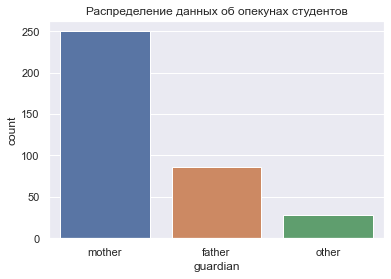

Уникальные значения для guardian: ['mother' 'father' 'other' nan]
Количество уникальных значений: 4
Распределение уникальных значений:
Пустых значений 31
Общая информация
count        364
unique         3
top       mother
freq         250
Name: guardian, dtype: object


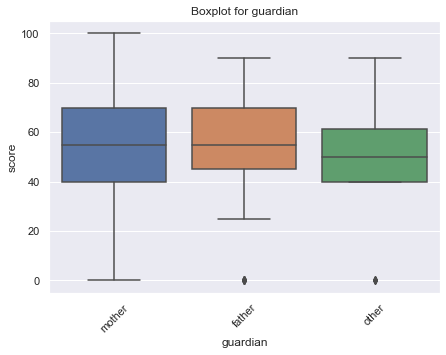

In [16]:
sns.countplot(students.guardian)
plt.title("Распределение данных об опекунах студентов")
plt.show()
basic_info(students, 'guardian')
get_boxplot(students, 'guardian')

В этом столбце присутствует 31 пустое значение, выбросов нет.

### traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

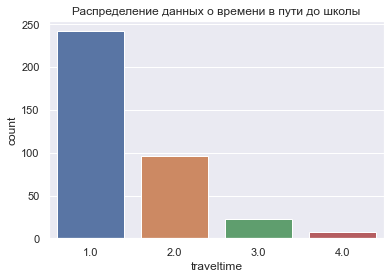

Уникальные значения для traveltime: [ 2.  1.  3. nan  4.]
Количество уникальных значений: 5
Распределение уникальных значений:
Пустых значений 28
Общая информация
count    367.000000
mean       1.438692
std        0.694181
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64


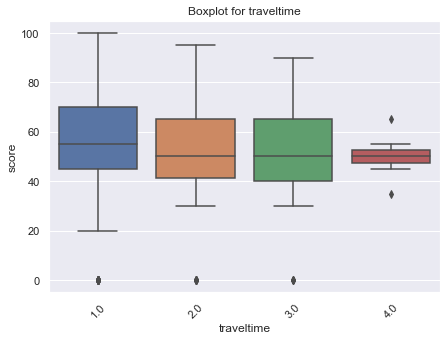

In [17]:
sns.countplot(students.traveltime)
plt.title("Распределение данных о времени в пути до школы")
plt.show()
basic_info(students, 'traveltime')
get_boxplot(students, 'traveltime')

В этом столбце также присутствует  28 пустых значений. Выбросов не наблюдается. На оценки визуально не влияет

### studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов) 

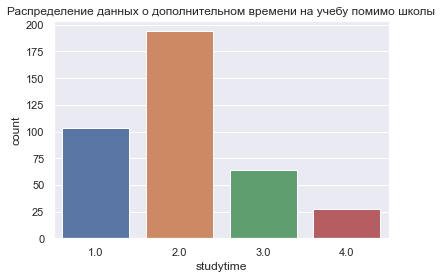

Уникальные значения для studytime: [ 2.  3.  1. nan  4.]
Количество уникальных значений: 5
Распределение уникальных значений:
Пустых значений 7
Общая информация
count    388.000000
mean       2.038660
std        0.842078
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64


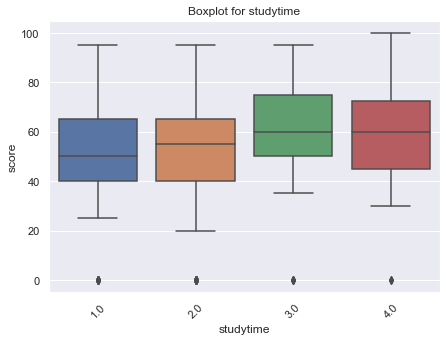

In [18]:
sns.countplot(students.studytime)
plt.title("Распределение данных о дополнительном времени на учебу помимо школы")
plt.show()
basic_info(students, 'studytime')
get_boxplot(students, 'studytime')

В этом столбце присутствует 7 пустых значений. Выбросов нет. Визуально видно разницу влияние дополнительно выделенного времени на оценки

### failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

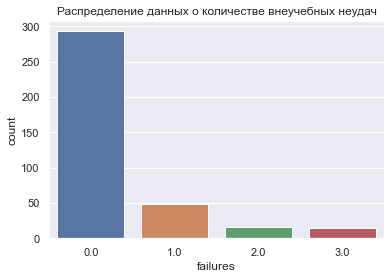

Уникальные значения для failures: [ 0.  3. nan  2.  1.]
Количество уникальных значений: 5
Распределение уникальных значений:
Пустых значений 22
Общая информация
count    373.000000
mean       0.337802
std        0.743135
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64


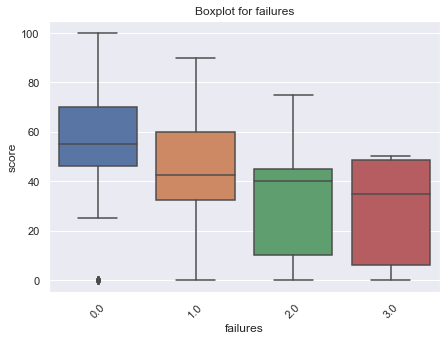

In [19]:
sns.countplot(students.failures)
plt.title("Распределение данных о количестве внеучебных неудач")
plt.show()
basic_info(students, 'failures')
get_boxplot(students, 'failures')

Видно влияние внеучебных неудач на оценки. Пустых значений замечено 22. Болше всего учеников ответили, что неудач не было

### Осмотр всех столбцов с дихотомическими  данными (yes или no)

Уникальные значения для schoolsup: ['yes' 'no' nan]
Количество уникальных значений: 3
Распределение уникальных значений:
Пустых значений 9
Общая информация
count     386
unique      2
top        no
freq      335
Name: schoolsup, dtype: object


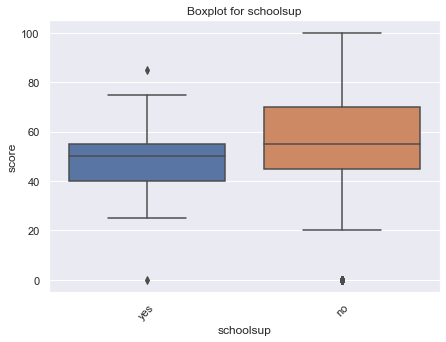

Уникальные значения для famsup: ['no' 'yes' nan]
Количество уникальных значений: 3
Распределение уникальных значений:
Пустых значений 39
Общая информация
count     356
unique      2
top       yes
freq      219
Name: famsup, dtype: object


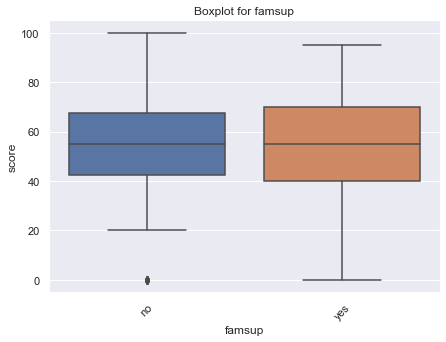

Уникальные значения для paid: ['no' nan 'yes']
Количество уникальных значений: 3
Распределение уникальных значений:
Пустых значений 40
Общая информация
count     355
unique      2
top        no
freq      200
Name: paid, dtype: object


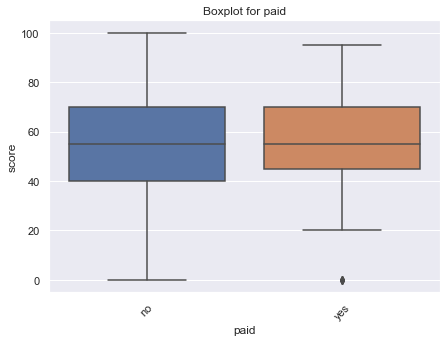

Уникальные значения для activities: ['no' 'yes' nan]
Количество уникальных значений: 3
Распределение уникальных значений:
Пустых значений 14
Общая информация
count     381
unique      2
top       yes
freq      195
Name: activities, dtype: object


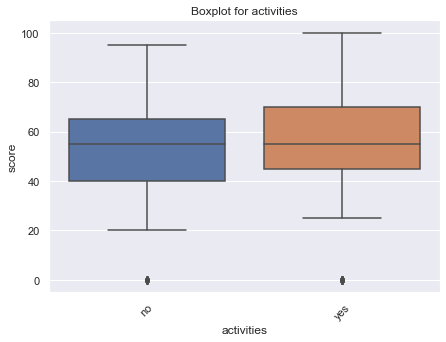

Уникальные значения для nursery: ['yes' 'no' nan]
Количество уникальных значений: 3
Распределение уникальных значений:
Пустых значений 16
Общая информация
count     379
unique      2
top       yes
freq      300
Name: nursery, dtype: object


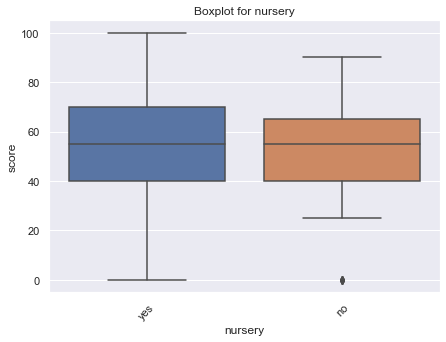

Уникальные значения для higher: ['yes' nan 'no']
Количество уникальных значений: 3
Распределение уникальных значений:
Пустых значений 20
Общая информация
count     375
unique      2
top       yes
freq      356
Name: higher, dtype: object


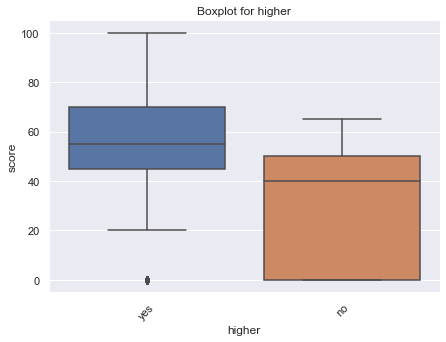

Уникальные значения для internet: [nan 'yes' 'no']
Количество уникальных значений: 3
Распределение уникальных значений:
Пустых значений 34
Общая информация
count     361
unique      2
top       yes
freq      305
Name: internet, dtype: object


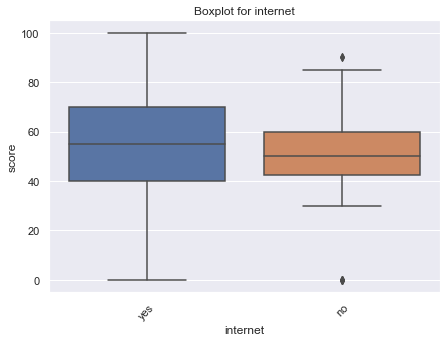

Уникальные значения для romantic: ['no' nan 'yes']
Количество уникальных значений: 3
Распределение уникальных значений:
Пустых значений 31
Общая информация
count     364
unique      2
top        no
freq      240
Name: romantic, dtype: object


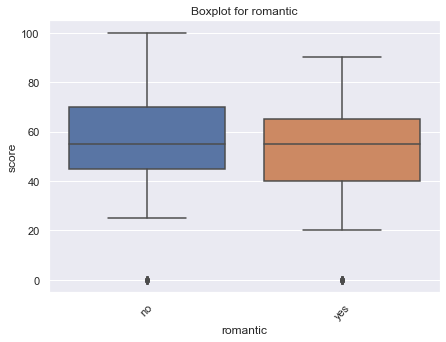

In [20]:
for col in ['schoolsup','famsup','paid','activities', 'nursery', 'higher', 'internet', 'romantic']:
    basic_info(students, col)
    get_boxplot(students, col)
    

В целом данные выглядят нормально. Выбросы не замечены, однако, присутствует большое количество пустых значений, наиболльшее количество 40 для тех кому оплачивали дополнительные занятия, а также 39 у тех кому помогала семья. Присутствуют значения с видимым влиянием на итоговые оценки.

### Осмотр всех столбцов с порядковыми данными (от 1 - очень плохо до 5 - очень хорошо)


Уникальные значения для famrel: [ 4.  5.  3. nan -1.  2.  1.]
Количество уникальных значений: 7
Распределение уникальных значений:
Пустых значений 27
Общая информация
count    368.000000
mean       3.937500
std        0.927277
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64


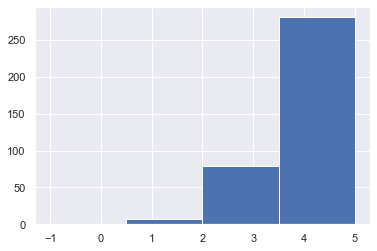

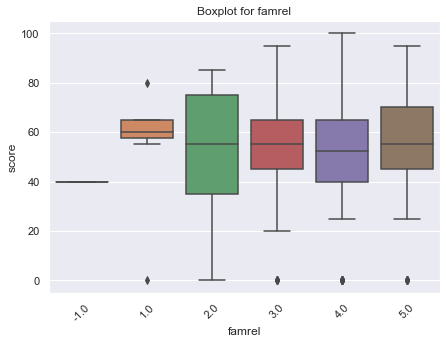

Уникальные значения для freetime: [ 3.  2.  4.  1.  5. nan]
Количество уникальных значений: 6
Распределение уникальных значений:
Пустых значений 11
Общая информация
count    384.000000
mean       3.231771
std        0.993940
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64


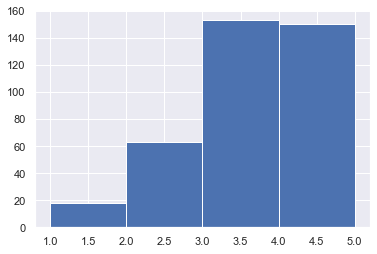

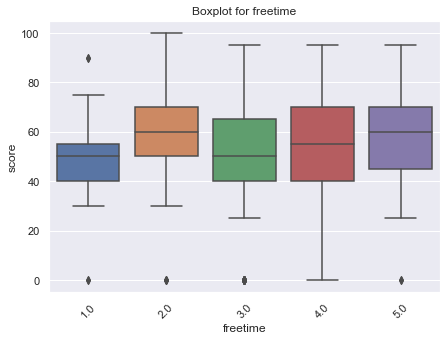

Уникальные значения для goout: [ 4.  3.  2.  1.  5. nan]
Количество уникальных значений: 6
Распределение уникальных значений:
Пустых значений 8
Общая информация
count    387.000000
mean       3.105943
std        1.115896
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64


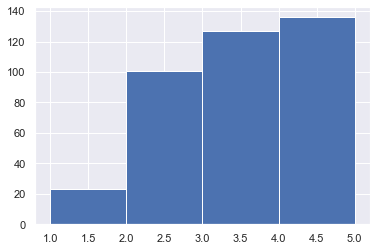

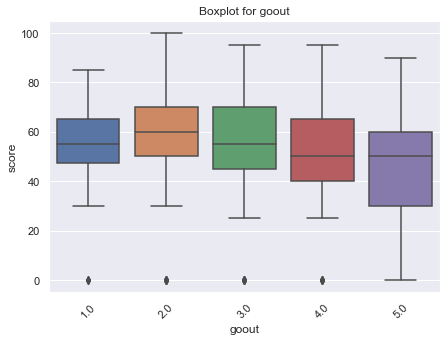

Уникальные значения для health: [ 3.  5.  1.  2.  4. nan]
Количество уникальных значений: 6
Распределение уникальных значений:
Пустых значений 15
Общая информация
count    380.000000
mean       3.531579
std        1.396019
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64


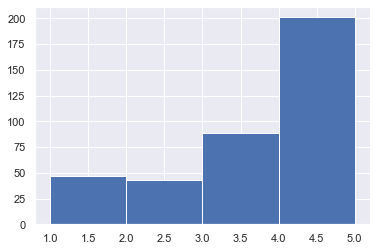

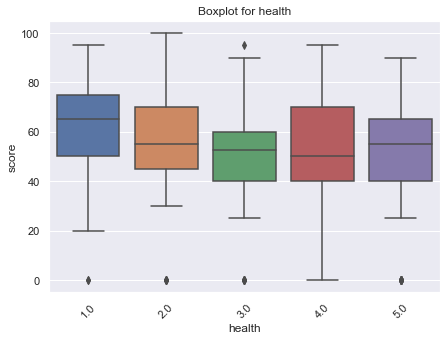

In [21]:
for col in ['famrel','freetime','goout','health']:
    plt.hist(students[col], bins=4)
   
    basic_info(students, col)
    get_boxplot(students, col)



В выборке по этим столбцам в столбце семейных отношений присутствует ошибочное значение в виде -1, скорее всего это ошибка и значение должно быть 1. В остальном в данных присутствуют пустые значения 

#  Обработка данных

### Удаление нулевых значений в целевом столбце 'score'

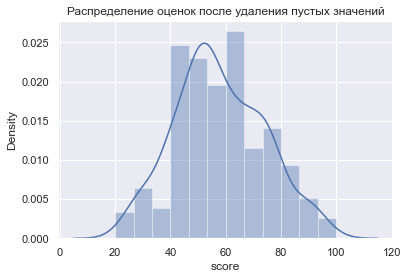

In [22]:
students.drop(students[students.score == 0].index, inplace=True)


sns.distplot(students.score)
plt.title("Распределение оценок после удаления пустых значений")
plt.show()

### Замена ошибочного значения в 'Fedu'

In [23]:
students.loc[students.Fedu == 40, 'Fedu'] = 4

### Замена ошибочного значения в 'Famrel'

In [24]:
students.loc[students.famrel == -1, 'famrel'] = 1

### Обрезка значений в столбце 'Absence'

In [25]:
max_outlier = 25
students.drop(students[students.absences > max_outlier].index, inplace=True)

### Заполнение пустых значений 

In [26]:
students.isnull().sum(axis=0)

school                  0
sex                     0
age                     0
address                16
famsize                23
Pstatus                39
Medu                    2
Fedu                   20
Mjob                   17
Fjob                   32
reason                 15
guardian               28
traveltime             23
studytime               7
failures               19
schoolsup               9
famsup                 35
paid                   37
activities             12
nursery                13
studytime, granular     7
higher                 19
internet               29
romantic               28
famrel                 23
freetime                8
goout                   7
health                 13
absences               11
score                   6
dtype: int64

Замена пустых значений будет произведена на моду для всех категориальных данных и на медиану для всех количественных данных

In [27]:
students[categorical_column] = students[categorical_column].fillna(
    students[categorical_column].mode().iloc[0])

In [28]:
students[numerical_column] = students[numerical_column].fillna(
    students[numerical_column].median().iloc[0])

# Корреляционный анализ

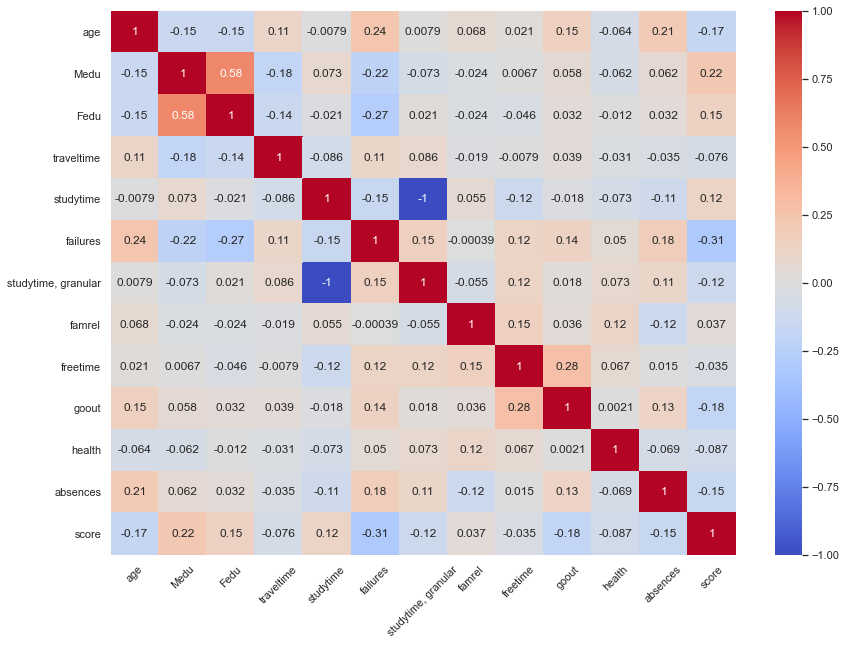

In [29]:
fig, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(students.corr(), annot=True, cmap='coolwarm', ax=ax)
plt.xticks(rotation=45)
plt.show()


*Основываясь на данных корреляционной таблицы столбцы 'studytime' и 'studytime, granular' по сути повторяют друг друга и мы можем удалить один из них. 
*Также видно достаточно высокую корреляцию между образованием родителей, что достаточно естественно.
*Также заметна корреляция между оценками и столбцом 'failure'


### Удаление лишнего столбца

In [30]:
students.drop('studytime, granular', axis=1, inplace=True)

# Анализ на значимые отличия в категориальных признаках

Для этого анализа нужна проверка, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента. Проверим нулевую гипотезу о том, что распределения оценок батончиков по различным параметрам неразличимы:

In [31]:
for column in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout',
       'health']:
    get_stat_dif(students, column)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Medu
Найдены статистически значимые различия для колонки Fedu
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки guardian
Найдены статистически значимые различия для колонки studytime
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки schoolsup
Найдены статистически значимые различия для колонки goout


Как видно эти столбцы являются статистически значимыми, в связи с чем они, а также 3 количественных столбца останутся для дальнейшего построения модели.

In [32]:
students_for_model = students.loc[:, [ 'sex', 'address', 'Medu', 'Fedu',
       'Mjob', 'guardian', 'studytime','failures', 'schoolsup', 'goout', 'absences', 'score', 'age'
       ]]
students_for_model.head()

,sex,address,Medu,Fedu,Mjob,guardian,studytime,failures,schoolsup,goout,absences,score,age
0,F,U,4.0,4.0,at_home,mother,2.0,0.0,yes,4.0,6.0,30.0,18
1,F,U,1.0,1.0,at_home,father,2.0,0.0,no,3.0,4.0,30.0,17
2,F,U,1.0,1.0,at_home,mother,2.0,3.0,yes,2.0,10.0,50.0,15
3,F,U,4.0,2.0,health,mother,3.0,0.0,no,2.0,2.0,75.0,15
4,F,U,3.0,3.0,other,father,2.0,0.0,no,2.0,4.0,50.0,16


# Выводы

* В этом проекте была проведена первичная обработка данных. 
* Был проведено распределение признака для числовых переменных и устранены выбросы.
* Было оценено количество уникальных значений для номинативных переменных.

* Был проведен корреляционный анализ количественных переменных
* В дальнейшем все не коррелирующие переменные были отобраны для последующего построения модели.
* Были устранены все номинативные переменные, которые не оказывают влияния на целевую переменную 'score'

Для дальнейшего анализа и пострения модели были отобраны переменные 
[ 'sex', 'address', 'Medu', 'Fedu',
       'Mjob', 'guardian', 'studytime', 'failures', 'schoolsup','goout', 'absences', 'score', 'age']
       
       
Почти все переменные содержали пропуски (кроме, данных о школе, возрасте и половой принадлежности.


Во многом зависимость значения оценки зависела от многих параметров (указаны выше). В целом выборка достаточно полна и информативна.

   